# 예제 : MNIST 숫자 이미지를 처리하는 신경망

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,))			# (1)
dense = layers.Dense(64, activation="relu")		# (2)
x = dense(inputs)					# (3)
x = layers.Dense(64, activation="relu")(x)		# (4)
outputs = layers.Dense(10)(x)				# (5)

model = keras.Model(inputs=inputs, outputs=outputs)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)
test_scores = model.evaluate(x_test, y_test, verbose=2)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/2
750/750 [==============================] - 4s 4ms/step - loss: 0.3494 - accuracy: 0.9002 - val_loss: 0.2072 - val_accuracy: 0.9383
Epoch 2/2
750/750 [==============================] - 3s 4ms/step - loss: 0.1677 - accuracy: 0.9506 - val_loss: 0.1483 - val_accuracy: 0.9558
313/313 - 0s - loss: 0.1434 - accuracy: 0.9590 - 423ms/epoch - 1ms/step


# 예제 : 필기체 숫자를 압축하는 오토인코더

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

encoding_dim = 32  		# 32 픽셀로 압출

# 함수형 API로 신경망 구성
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0708 - val_loss: 0.0423
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0360 - val_loss: 0.0304
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0266 - val_loss: 0.0225
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0208 - val_loss: 0.0184
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0174 - val_loss: 0.0157
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0151 - val_loss: 0.0139
Epoch 7/50
235/235 [==============================] - 2s 11ms/step - loss: 0.0136 - val_loss: 0.0127
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0125 - val_loss: 0.0118
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0119 - val_loss: 0.0113
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0114 - val_loss: 0.01

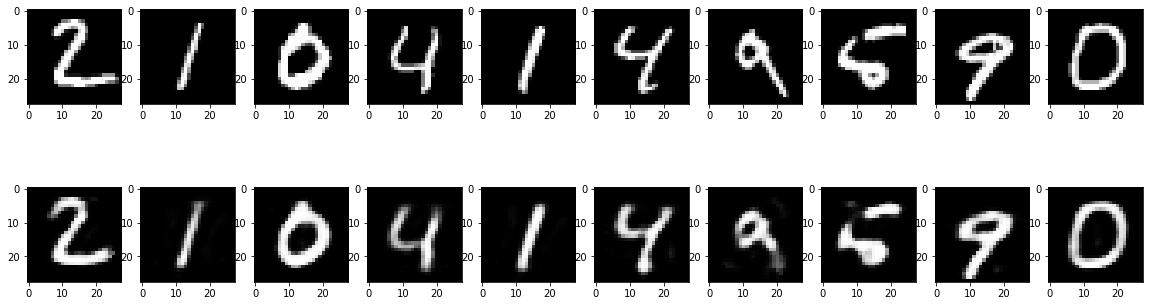

In [6]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
plt.show()

# 예제 : 잡음이 들어간 필기체 숫자를 복원하는 오토인코더

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

encoding_dim = 32  
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)

In [8]:
mnist = tf.keras.datasets.mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [9]:
noise_factor = 0.55

original_train = x_train
original_test = x_test
noise_train = np.random.normal(0, 1, original_train.shape)
noise_test = np.random.normal(0, 1, original_test.shape)
noisy_train = original_train + noise_factor * noise_train
noisy_test = original_test + noise_factor * noise_test

In [10]:
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(noisy_train, original_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(noisy_test, original_test))

denoised_images = autoencoder.predict(noisy_test)

Epoch 1/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0731 - val_loss: 0.0453
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0400 - val_loss: 0.0352
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0329 - val_loss: 0.0304
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0292 - val_loss: 0.0276
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0269 - val_loss: 0.0256
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0252 - val_loss: 0.0243
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0239 - val_loss: 0.0231
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0230 - val_loss: 0.0224
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0224 - val_loss: 0.0219
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0219 - val_loss: 0.0216

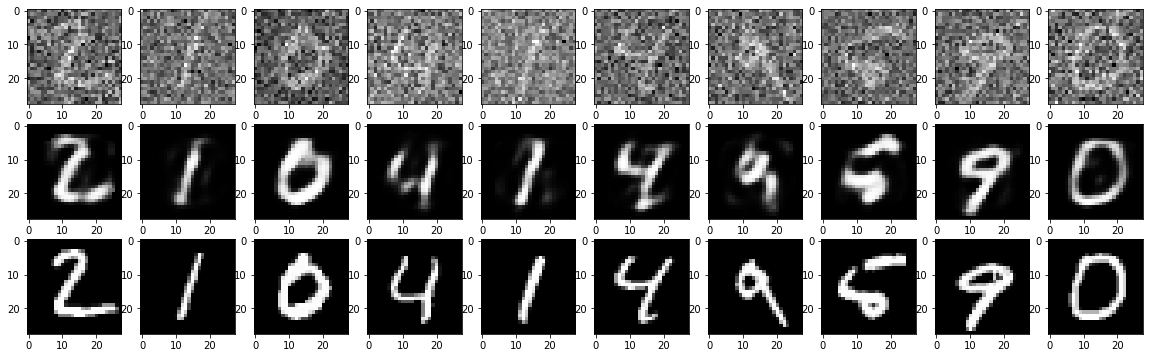

In [11]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(noisy_test[i].reshape(28, 28), cmap='gray')
    plt.gray()

    ax = plt.subplot(3, n, i + n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    plt.gray()

    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(original_test[i].reshape(28, 28), cmap='gray')
    plt.gray()
plt.show()

# GAN
# 예제 : GAN으로 숫자 이미지 생성

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# 학습 데이터와 테스트 데이터 분리
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 이미지를 [0, 1] 범위로 스케일링
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
BATCH_SIZE=128
EPOCHS=2000
Z_DIMENSIONS=32
data = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))

### 판별자 신경망 구축

In [3]:
def make_discriminator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', 
	activation='relu', input_shape=[28, 28, 1]))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same', 
	activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same', 
	activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    return model

In [4]:
discriminator = make_discriminator()

discriminator.compile(loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(lr=0.0004),
                      metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 생성자 신경망 구축

In [5]:
def make_generator():
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(7*7*64, input_shape=(Z_DIMENSIONS,)))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.9))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Reshape((7, 7, 64)))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.UpSampling2D())
    model.add(tf.keras.layers.Conv2DTranspose(32,
                            kernel_size=5, padding='same',
                            activation=None,))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.9))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.UpSampling2D())
    model.add(tf.keras.layers.Conv2DTranspose(16,
                            kernel_size=5, padding='same',
                            activation=None,))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.9))
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2D(1, kernel_size=5, padding='same',
                   activation='sigmoid'))
    return model

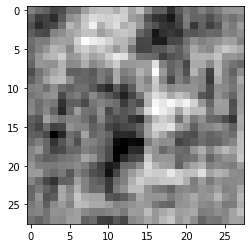

In [6]:
generator = make_generator()

noise = tf.random.normal([1, Z_DIMENSIONS])
generated_image = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [7]:
z = tf.keras.layers.Input(shape=(Z_DIMENSIONS,))
fake_image = generator(z)
discriminator.trainable = False
prediction = discriminator(fake_image)
gan_model = tf.keras.models.Model(z, prediction)

gan_model.compile(loss='binary_crossentropy',
                          optimizer=tf.keras.optimizers.Adam(lr=0.0004),
                          metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


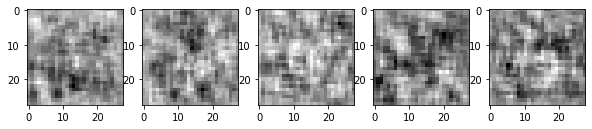

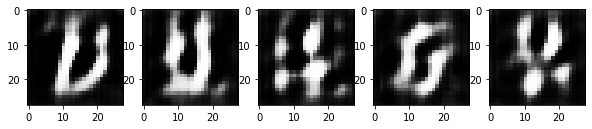

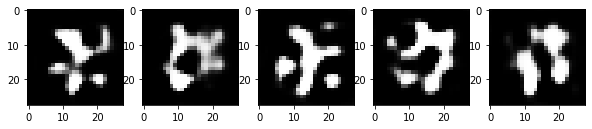

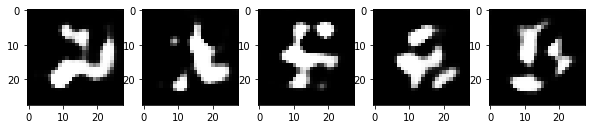

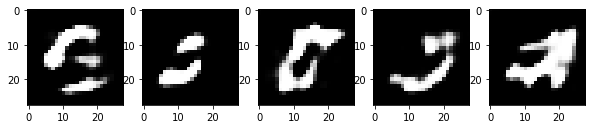

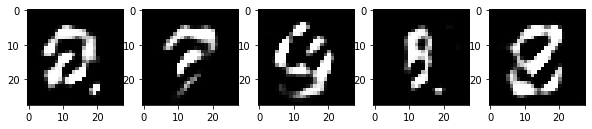

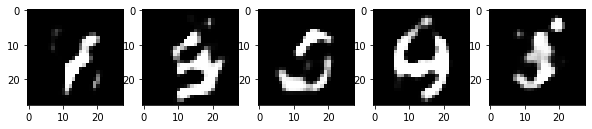

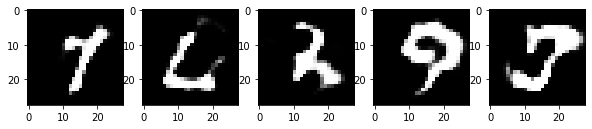

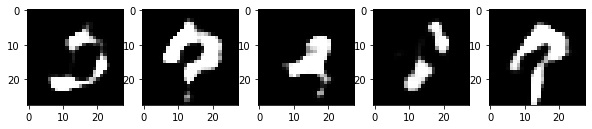

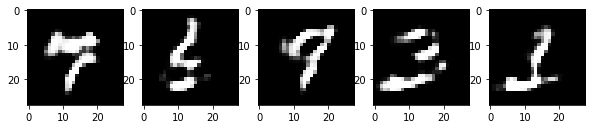

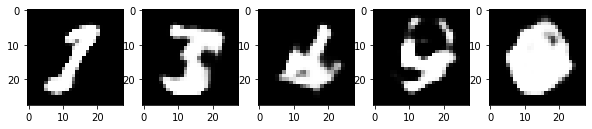

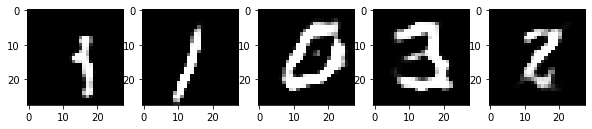

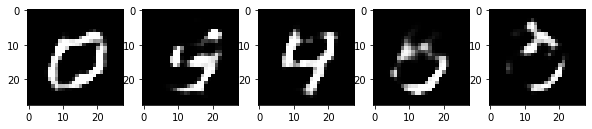

In [8]:
def train_gan():
    for i in range(EPOCHS):
        real_images = np.reshape(
            data[np.random.choice(data.shape[0],
                                  BATCH_SIZE,
                                  replace=False)], (BATCH_SIZE,28,28,1))
        fake_images = generator.predict(
           np.random.uniform(-1.0, 1.0,
                             size=[BATCH_SIZE, Z_DIMENSIONS]))

        x = np.concatenate((real_images,fake_images))

        y = np.ones([2*BATCH_SIZE,1])
        y[BATCH_SIZE:,:] = 0

        discriminator.train_on_batch(x, y)
        noise = np.random.uniform(-1.0, 1.0, size=[BATCH_SIZE, Z_DIMENSIONS])
        y = np.ones([BATCH_SIZE,1])

        gan_model.train_on_batch(noise, y)
 
        if i%100 == 0:
           noise = np.random.uniform(-1.0, 1.0,
                                     size=[5, Z_DIMENSIONS])
           generated_image = generator.predict(noise)
           plt.figure(figsize=(10,10))
           for i in range(generated_image.shape[0]):
               plt.subplot(1, 5, i+1)
               plt.imshow(generated_image[i, :, :, 0],
                          cmap='gray')
           plt.show()
train_gan()